 Game of Life

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def create_empty_board(height, width):
  """Create an empty board (numpy array) with `height` rows and `width` columns.

  Inputs:
    height (int):  number of rows for board.
    width (int):  number of columns for board.

  Outputs:
    board (numpy array):  empty board of size height by width, full of zeros.
  """
  return np.zeros((height, width))


def create_random_board(height, width, prob_red, prob_blue):
  """Create a board (numpy array) with `height` rows and `width` columns, where
  roughly `prob_red` fraction of the cells are red and roughly `prob_blue`
  fraction of the cells are blue.  Checks that the total probability of a cell
  to be non-empty is not more than 100%.

  Inputs:
    height (int):  number of rows for board.
    width (int):  number of columns for board.
    prob_red (float):  probability of a cell to be red.
    prob_blue (float):  probability of a cell to be blue.

  Outputs:
    board (numpy array):  board of size height by width, with some cells red
      (denoted by 1s), some cells blue (denoted by 2s), and some cells empty
      (denoted by 0s).
  """
  assert prob_red + prob_blue <= 1

  board = create_empty_board(height, width)
  rand_board = np.random.rand(height, width)

  board[np.where(rand_board < prob_red)] = 1
  board[np.where(rand_board > 1-prob_blue)] = 2

  return board


def visualize_board(board, red_fraction, blue_fraction, iteration):
  """Helper function to create a plot of the board.  It renders 0s in `board` as
  white, 1s as red, and 2s as blue.  It also draws markers on any cells that are
  unhappy.

  Inputs:
    board (numpy array):  game board.
    red_fraction (float, from 0.0 to 1.0):  the fraction of red neighbors a red
      cell requires to be happy.
    blue_fraction (float, from 0.0 to 1.0):  the fraction of blue neighbors a
      blue cell requires to be happy.
    iteration (int):  the iteration number for solving the board, for
      rendering it in the title of the plot.

  Outputs:
    Does not return anything but creates and renders a new matplotlib plot.
  """
  plt.figure()
  colored_board = np.tile(np.expand_dims(np.ones_like(board), axis=0), (3, 1, 1))
  colored_board[:][np.tile(board==1, (3, 1, 1))] = np.repeat(np.array([1, 0, 0]), np.sum(board==1))
  colored_board[:][np.tile(board==2, (3, 1, 1))] = np.repeat(np.array([0, 0, 1]), np.sum(board==2))
  colored_board = np.transpose(colored_board, (1, 2, 0)).astype('float32')
  plt.imshow(colored_board)

  title = f'Board, Red Fraction {red_fraction}, Blue Fraction {blue_fraction}, Iteration {iteration}'
  plt.title(title)

  # Plot a yellow 'X' on all the unhappy cells, as determined by your function.
  happiness_map = board_cells_are_happy(board, red_fraction, blue_fraction)

  board_size = len(board)
  marker_size = 500*25/(board_size**2)

  unhappy_rows, unhappy_cols = np.where(happiness_map == False)
  for row, col in zip(unhappy_rows, unhappy_cols):
    plt.scatter(col, row, marker='X', s=marker_size, color='yellow')

In [ ]:




def board_cells_are_happy(board, red_fraction, blue_fraction):
  """

  Returns a map of the board where each cell is marked as happy (boolean True)
  or unhappy (boolean False).

  Inputs:
    board (numpy array):  game board.
    red_fraction (float, from 0.0 to 1.0):  the fraction of red neighbors a red
      cell requires to be happy.
    blue_fraction (float, from 0.0 to 1.0):  the fraction of blue neighbors a
      blue cell requires to be happy.

  Outputs:
    happy_map (numpy array, bool-valued):   an array matching the size of the
      game board, where True-valued cells indicate happy or empty cells, and
      False-valued cells indicate occupied unhappy cells.
  """
  #happy_map = np.zeros_like(board, dtype=bool)   # starts with all locations
                                                 # marked as unhappy (False).

  boardwzer=np.zeros((board.shape[0] + 2 , board.shape[1] + 2), dtype=board.dtype)
  boardwzer[1:1+board.shape[0], 1:1+board.shape[1]] = board#
  happy_map = np.zeros_like(boardwzer, dtype=bool)
  for row in range(boardwzer.shape[0]):
      for col in range(boardwzer.shape[1]):
          element = boardwzer[row, col]
          if element ==1:
            #red cells
            red_count=-1
            blue_count=0
            for inrow in range(row-1,row+1):
              for incol in range(col-1,col+1):
                element_test = boardwzer[inrow, incol]
                if element_test ==1:
                  red_count=+1
                elif element_test==2:
                  blue_count=+1
            if (red_count/(blue_count+0.0000001)) >= red_fraction:
              happy_map[row,col]=True
            else:
              happy_map[row,col]=False

          elif element==2:
          #blue cells
            red_count=0
            blue_count=-1
            for inrow in range(row-1,row+1):
              for incol in range(col-1,col+1):
                element_test = board[inrow,incol]
                if element_test ==1:
                  red_count=+1
                elif element_test==2:
                  blue_count=+1
            if (blue_count/(red_count+0.0000001)) >= blue_fraction:
              happy_map[row,col]=True
            else:
              happy_map[row,col]=False
          else :
            happy_map[row,col]=True
  happy_resized=happy_map[1:(boardwzer.shape[0]-1),1:(boardwzer.shape[0]-1)]



  return happy_resized   # `happy_map` should be updated in student code
def check_fractions(board, row, col, red_fraction, blue_fraction):
  '''
  checks for other spots where the if the item wold move to it then the fraction of like neighbours would increas.
  if there are no happy places for it to move to.

  Inputs:
    board (numpy array):  game board.
    row (int):  the row of the cell of interest.
    col (int):  the column of the cell of interest.
    red_fraction (float, from 0.0 to 1.0):  the fraction of red neighbors a red
      cell requires to be happy.
    blue_fraction (float, from 0.0 to 1.0):  the fraction of blue neighbors a
      blue cell requires to be happy.

  Ouputs:
    new_row (int):  the row of the suggested new location for the cell to move.
    new_col (int):  the column of the suggested new location for the cell to
      move.
  '''
  testfraction=0
  element= board[row, col]
  if element==1:
    for row_empt in range(board.shape[0]):
      for col_empt in range(board.shape[1]):
        if board[row_empt,col_empt]==0:
          red_count=-1
          blue_count=0
          for inrow in range(row-1,row+1):
           for incol in range(col-1,col+1):
              element_test = board[inrow, incol]
              if element_test ==1:
               red_count=+1
              elif element_test==2:
               blue_count=+1
          if (red_count/(blue_count+0.0000001)) > testfraction:
            good_row=row_empt
            good_col=col_empt

  elif element==2:
    for row_empt in range(board.shape[0]):
      for col_empt in range(board.shape[1]):
        if board[row_empt,col_empt]==0:
          red_count=0
          blue_count=-1
          for inrow in range(row-1,row+1):
           for incol in range(col-1,col+1):
              element_test = board[inrow, incol]
              if element_test ==1:
               red_count=+1
              elif element_test==2:
               blue_count=+1
          if (blue_count/(red_count+0.0000001)) >= testfraction:
            good_row=row_empt
            good_col=col_empt
  return (good_row,good_col)
def closest_best_place_to_move(board, row, col, red_fraction, blue_fraction):
  """

  Inputs:
    board (numpy array):  game board.
    row (int):  the row of the cell of interest.
    col (int):  the column of the cell of interest.
    red_fraction (float, from 0.0 to 1.0):  the fraction of red neighbors a red
      cell requires to be happy.
    blue_fraction (float, from 0.0 to 1.0):  the fraction of blue neighbors a
      blue cell requires to be happy.

  Ouputs:
    new_row (int):  the row of the suggested new location for the cell to move.
    new_col (int):  the column of the suggested new location for the cell to
      move.
  """
  assert board[row, col] != 0
  good_row = row      # should be updated in student code
  good_col = col
  dist=100000000000000
  # INSERT STUDENT CODE HERE:
  element= board[row, col]
  if element==1:
    for row_empt in range(board.shape[0]):
      for col_empt in range(board.shape[1]):
        if board[row_empt,col_empt]==0:
          red_count=-1
          blue_count=0
          for inrow in range(row-1,row+1):
           for incol in range(col-1,col+1):
              element_test = board[inrow, incol]
              if element_test ==1:
               red_count=+1
              elif element_test==2:
               blue_count=+1
          if (red_count/blue_count) >= red_fraction:
            dist_test=(abs(row-row_empt)-abs(col-col_empt))
            if dist_test<dist:
              good_row=row_empt
              good_col=col_empt
          else:
            check_fractions(board, row, col, red_fraction, blue_fraction)

  elif element==2:
    for row_empt in range(board.shape[0]):
      for col_empt in range(board.shape[1]):
        if board[row_empt,col_empt]==0:
          red_count=0
          blue_count=-1

          for inrow in range(row-1,row+1):
           for incol in range(col-1,col+1):
              element_test = board[inrow, incol]
              if element_test ==1:
               red_count=+1
              elif element_test==2:
               blue_count=+1
          if (blue_count/red_count) >= blue_fraction:
            dist_test=abs(row-row_empt)-abs(col-col_empt)
            if dist_test<dist:
              good_row=row_empt
              good_col=col_empt
            else:
              check_fractions(board, row, col, red_fraction, blue_fraction)
  return (good_row,good_col)
  #good_row = row      # should be updated in student code
  #good_col = col      # should be updated in student code

  # Strongly suggest keeping the below print statement to give some debugging
  # help, if the suggested choices don't look right, and to give some feedback
  # that your code is running.
  print(f'Suggest moving ({row}, {col}) to ({good_row}, {good_col})')


def perform_an_iteration(board, red_fraction, blue_fraction):
  """

  Performs one iteration of the game.  The unhappy agents are moved one-by-one
  in order from left to right, then from top to bottom.  If an agent was unhappy
  at the start of the round and then becomes happy because one of its neighbors
  moves, it does not move that round (because the closest possible location that
  makes it happy is where it is right now).  If an agent was happy but becomes
  unhappy because one of its neighbor moves, it waits until the next round to
  move.

  Inputs:
    board (numpy array):  game board.
    red_fraction (float, from 0.0 to 1.0):  the fraction of red neighbors a red
      cell requires to be happy.
    blue_fraction (float, from 0.0 to 1.0):  the fraction of blue neighbors a
      blue cell requires to be happy.

  Ouputs:
    board (numpy array):  game board with the changes from one full iteration of
      gameplay.
  """

  Map_of_hap=board_cells_are_happy(board, red_fraction, blue_fraction)
  for row_empt in range(board.shape[0]):
      for col_empt in range(board.shape[1]):
        if not Map_of_hap[row,col]:
          row_move,col_move=closest_best_place_to_move(board, row, col, red_fraction, blue_fraction)
          temp_hold=board[row,col]
          board[row,col]=0
          board[row_move,col_move]=temp_hold



  return board    # `board` should be updated in student code


def resolve_board(board, red_fraction, blue_fraction):
  """

  Resolves the board through as many iterations as necessary, terminating either
  when board is all happy or when the board cannot be updated to a happier
  state.

  Inputs:
    board (numpy array):  game board.
    red_fraction (float, from 0.0 to 1.0):  the fraction of red neighbors a red
      cell requires to be happy.
    blue_fraction (float, from 0.0 to 1.0):  the fraction of blue neighbors a
      blue cell requires to be happy.

  Ouputs:
    Does not return anything but creates and renders a new matplotlib plot for
    every iteration of the game.
  """
  iteration = 0                       # should be updated in student code
  how_finished = 'NOT successfully'   # should be updated in student code
  visualize_board(board, red_fraction, blue_fraction, iteration)

  old_board=np.zeros_like(board, dtype=dtype(board))
  i=1
  true_array = np.full((board.shape[0],board.shape[1]), True, dtype=bool)
  while i==1:
    old_board=board
    board=perform_an_iteration(board, red_fraction, blue_fraction)
    iteration+1
    all_hap_test=board_cells_are_happy(board, red_fraction, blue_fraction)
    if all_hap_test==true_array:
      i=0
      how_finished="as all items are happy"
    elif old_board==board:
      i=0
      how_finished="there are no better places for the unhappy cellse to go"





  visualize_board(board, red_fraction, blue_fraction, iteration)
  print(f'Finished {how_finished} in {iteration} iterations.')

# Test Code


In [ ]:
def check_case_example_from_handout():
  """This case matches the 5-by-5 example in the homework handout."""
  board = np.array([[1, 0, 1, 1, 2],
                    [0, 2, 0, 0, 0],
                    [1, 0, 0, 2, 0],
                    [0, 1, 2, 1, 2],
                    [0, 2, 2, 0, 1]])
  resolve_board(board, 0.5, 0.5)

def check_case_where_fraction_is_not_satisfied():
  """This example tests the edge case where a square is unhappy and there is no
  other location for it to move where it would be happy.  In this case the
  square needs to move to (one of) the cell(s) with the highest percentage of
  like-neighbors."""
  board = np.array([[2, 0, 1, 0, 2],
                    [0, 2, 2, 0, 0],
                    [2, 0, 0, 0, 2],
                    [1, 0, 0, 2, 0],
                    [0, 2, 0, 0, 2]])
  resolve_board(board, 0.5, 0.5)

def check_case_with_stuck_game():
  """This case tests the edge case where the board is completely full and there
  are unhappy squares.  The `resolve_board` function should terminate after 1
  iteration since none of the unhappy cells can move."""
  board = np.array([[1, 0], [0, 2]])
  resolve_board(board, 0.5, 0.5)

def check_case_with_even_neighbors():
  """This case tests the edge case where the center square has an even number of
  blue and red neighbors.  With 50% as the requirement for like neighbors, this
  center square should be happy.  However two of the other squares are unhappy
  at first.  One can move to increase its fraction of like neighbors, but
  ultimately the game has to terminate early since it can't be made entirely
  happy."""
  board = np.array([[1, 0, 2], [0, 2, 0], [2, 0, 1]])
  resolve_board(board, 0.5, 0.5)

def check_case_where_one_team_does_not_care():
  """This case tests different preference fractions between the red and blue
  teams.  Specifically, only red cares about the fraction of its neighbors (to
  be at least 50% red) while the blue team does not care at all (neighbors to be
  at least 0% blue)."""
  board = np.array([[2, 2, 2, 1, 0, 1, 0, 1, 2, 2],
                    [0, 1, 2, 1, 1, 2, 0, 2, 0, 2],
                    [1, 2, 1, 2, 2, 0, 0, 0, 0, 2],
                    [1, 1, 0, 1, 1, 2, 2, 0, 1, 1],
                    [1, 2, 0, 1, 1, 1, 1, 2, 2, 2]])
  resolve_board(board, 0.5, 0.0)

def check_case_with_unbalanced_board():
  """This case features a random board with approximately twice as many blue
  cells as red cells, where both teams prefer half of their neighbors to match
  their color.  This case usually terminates with blue ending happy and some
  red cells ending unhappy but unable to move to happier locations."""
  board = create_random_board(20, 20, 0.3, 0.6)
  resolve_board(board, 0.5, 0.5)

def check_case_with_slight_neighbor_preference():
  """This case features a random board and teams which only slightly prefer
  their neighbors to match their color."""
  board = create_random_board(20, 20, 0.45, 0.45)
  resolve_board(board, 0.2, 0.2)

def check_case_with_large_crowded_board():
  """This case tests a large 50-by-50 game board with a fairly densely packed
  occupancy at around 90% occupied.  The board is randomly generated every time.
  This example can take minutes to solve (~5 minutes from the teaching staff's
  experience) and successfully terminates, usually in under 10 iterations."""
  board = create_random_board(50, 50, 0.45, 0.45)
  resolve_board(board, 0.5, 0.5)

def check_random_case_with_board_size_fraction_density(
    height, width, red_fraction, blue_fraction, red_density, blue_density):
  """This is a flexible test case which you can use to provide your own board
  size, red and blue fractions, and red and blue densities.  The densities refer
  to the approximate fraction of the cells to set to red/blue respectively.  You
  can call this function yourself with these provided values."""
  board = create_random_board(height, width, red_density, blue_density)
  resolve_board(board, red_fraction, blue_fraction)

# Test Results

There are several cells which call one of the above defined tests at a time.  When you turn in your assignment, ensure to show the output of each of these code cells.

IndexError: ignored

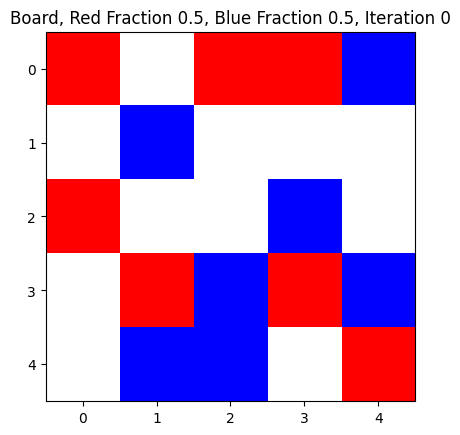

In [ ]:
check_case_example_from_handout()

IndexError: ignored

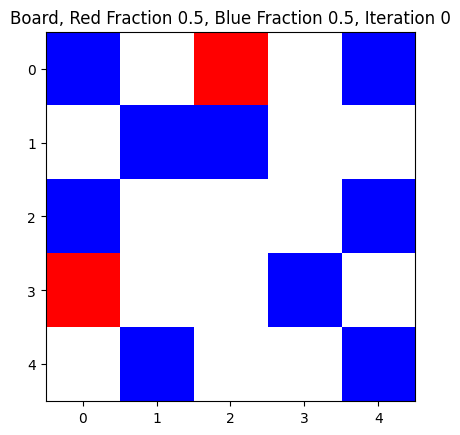

In [ ]:
check_case_where_fraction_is_not_satisfied()

In [ ]:
check_case_with_stuck_game()

In [ ]:
check_case_with_even_neighbors()

In [ ]:
check_case_where_one_team_does_not_care()

In [ ]:
check_case_with_unbalanced_board()

IndexError: ignored

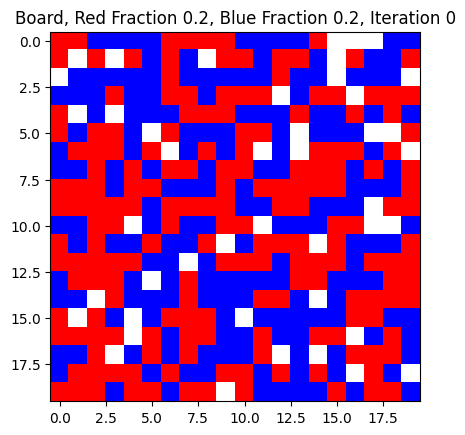

In [ ]:
check_case_with_slight_neighbor_preference()

In [ ]:
check_case_with_large_crowded_board()

In [ ]:
# Feel free to change the customizable inputs given here.
check_random_case_with_board_size_fraction_density(3, 5, 0.5, 0.5, 0.25, 0.25)